# TASK-3 TO EXPLORE UNSUPERVISED MACHINE LEARNING:

### OBJECTIVE:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

Firstly let's import all the necessary packages or libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris_data=pd.read_csv('iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Now we will check how many rows and columns our dataset contains:

In [4]:
iris_data.shape                  #150 rows and 6 columns

(150, 6)

Let's check unique column in species:

In [5]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

check for the null values:

In [6]:
iris_data.isnull().sum()   #there is no null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now check some overall information related to our data.

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


Now we will see some statistical information:

In [8]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


describe function tells us about the numerical values only. It tells about mean, median and quantile values and minimum and maximum. 25% is a quantile value. So for SepalLengthCm, 25% is 5.1 cm. That means that 25% of flowers have sepalLengthCm value lower than or equal to 5.1. Similarly for others. Also 50% actually is the median value of that feature, which also means that 50% of the instances have values lower than or equal to that value.

Now we don't require id column so let's just drop it.

In [9]:
iris_data.drop('Id',axis=1,inplace=True)

In [10]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

Lets first change the categorical values to simpler one. We know that each species is of Iris flower, we will drop prefix 'Iris-' from each category.

In [12]:
iris_data.loc[iris_data["Species"] == "Iris-setosa", ["Species"]] = "Setosa"
iris_data.loc[iris_data["Species"] == "Iris-virginica", ["Species"]] = "Virginica"
iris_data.loc[iris_data["Species"] == "Iris-versicolor", ["Species"]] = "Versicolor"
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Visualization:

Plotting a simple countplot to see count:

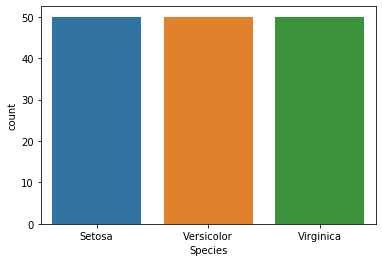

In [13]:
sns.countplot('Species',data=iris_data)

In [14]:
iris=iris_data.corr()  # using correlation we can see which all column are highly correlated with another column.

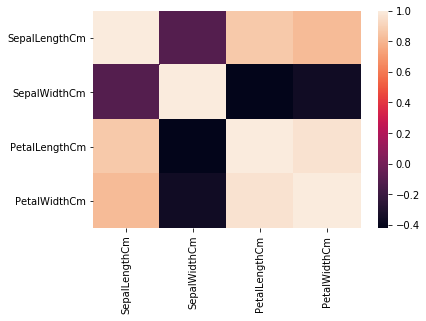

In [15]:
sns.heatmap(iris)

Now using scatter plot

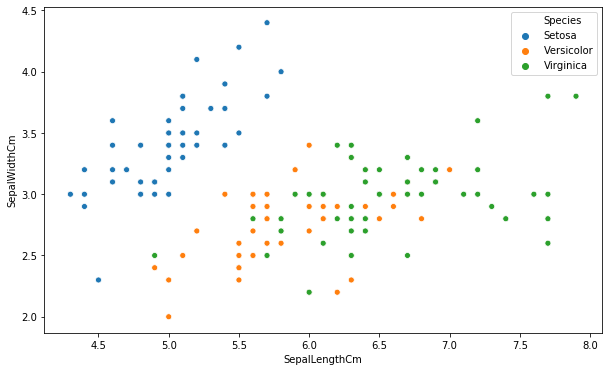

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_data,hue='Species')

After analyzing above scatterplot we can see that 'sepal length' of sentosa is less than 6.0 and length of versicolor is less than virginica. 

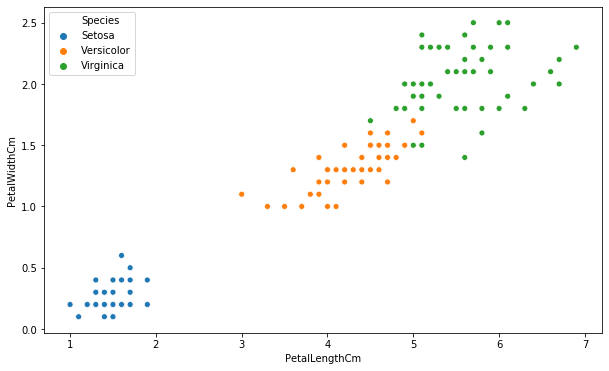

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=iris_data,hue='Species')


In above graph sentosa has very less length and width as compare to virginica.

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

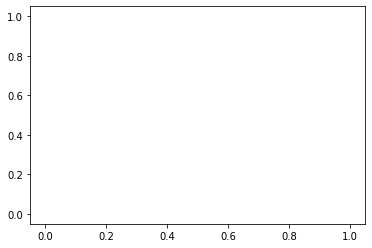

In [32]:
sns.lineplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris_data)